In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
import os
print(os.getcwd())
import warnings
warnings.filterwarnings('ignore')

/content


In [21]:
df=pd.read_csv("/content/MonthWiseMarketArrivals_Clean.csv",parse_dates=["date"],index_col="date")

In [22]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
2005-01-01,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR
2006-01-01,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR
2010-01-01,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR
2011-01-01,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR
2012-01-01,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR


In [23]:
df.drop(columns='month',axis=0,inplace=True)

In [25]:
df.drop(columns='year',axis=0,inplace=True)

In [26]:
df

,market,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,
2005-01-01,ABOHAR(PB),2350,404,493,446,PB,ABOHAR
2006-01-01,ABOHAR(PB),900,487,638,563,PB,ABOHAR
2010-01-01,ABOHAR(PB),790,1283,1592,1460,PB,ABOHAR
2011-01-01,ABOHAR(PB),245,3067,3750,3433,PB,ABOHAR
2012-01-01,ABOHAR(PB),1035,523,686,605,PB,ABOHAR
...,...,...,...,...,...,...,...
2011-12-01,YEOLA(MS),131326,282,612,526,MS,YEOLA
2012-12-01,YEOLA(MS),207066,485,1327,1136,MS,YEOLA
2013-12-01,YEOLA(MS),215883,472,1427,1177,MS,YEOLA


In [27]:
df.columns

Index(['market', 'quantity', 'priceMin', 'priceMax', 'priceMod', 'state',
       'city'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10227 entries, 2005-01-01 to 2015-12-01
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   quantity  10227 non-null  int64 
 2   priceMin  10227 non-null  int64 
 3   priceMax  10227 non-null  int64 
 4   priceMod  10227 non-null  int64 
 5   state     10227 non-null  object
 6   city      10227 non-null  object
dtypes: int64(4), object(3)
memory usage: 639.2+ KB


In [29]:
df.shape

(10227, 7)

In [30]:
df.city.unique()

array(['ABOHAR', 'AGRA', 'AHMEDABAD', 'AHMEDNAGAR', 'AJMER', 'ALIGARH',
       'ALWAR', 'AMRITSAR', 'BALLIA', 'BANGALORE', 'BAREILLY', 'BELGAUM',
       'BHATINDA', 'BHAVNAGAR', 'BHOPAL', 'BHUBNESWER', 'BIHARSHARIF',
       'BIJAPUR', 'BIKANER', 'BOMBORI', 'BURDWAN', 'CHAKAN', 'CHALLAKERE',
       'CHANDIGARH', 'CHANDVAD', 'CHENNAI', 'CHICKBALLAPUR', 'COIMBATORE',
       'DEESA', 'DEHRADOON', 'DELHI', 'DEORIA', 'DEVALA', 'DEWAS',
       'DHAVANGERE', 'DHULIA', 'DINDIGUL', 'DINDORI', 'ETAWAH', 'GONDAL',
       'GORAKHPUR', 'GUWAHATI', 'HALDWANI', 'HASSAN', 'HOSHIARPUR',
       'HUBLI', 'HYDERABAD', 'INDORE', 'JAIPUR', 'JALANDHAR', 'JALGAON',
       'JAMMU', 'JAMNAGAR', 'JODHPUR', 'JUNNAR', 'KALVAN', 'KANPUR',
       'KARNAL', 'KHANNA', 'KOLAR', 'KOLHAPUR', 'KOLKATA', 'KOPERGAON',
       'KOTA', 'KURNOOL', 'LASALGAON', 'LONAND', 'LUCKNOW', 'LUDHIANA',
       'MADURAI', 'MAHUVA', 'MALEGAON', 'MANDSOUR', 'MANMAD', 'MEERUT',
       'MIDNAPUR', 'MUMBAI', 'NAGPUR', 'NANDGAON', 'NASIK', 'NEEMU

In [32]:
df_mumbai = df[df.city == "MUMBAI"]

In [33]:
df_mumbai.describe()

,quantity,priceMin,priceMax,priceMod
count,146.000000,146.000000,146.000000,146.000000
mean,221721.308219,900.842466,1316.945205,1114.452055
std,40792.800998,730.909209,1019.072444,883.113380
min,131590.000000,215.000000,335.000000,287.000000
25%,195125.000000,434.500000,647.750000,544.500000
50%,222220.000000,691.500000,982.500000,846.500000
75%,246050.000000,1098.750000,1623.250000,1391.500000
max,413681.000000,4005.000000,5517.000000,4714.000000


In [51]:
df.corr()

,quantity,priceMin,priceMax,priceMod
quantity,1.000000,-0.106708,-0.022406,-0.056827
priceMin,-0.106708,1.000000,0.781736,0.883396
priceMax,-0.022406,0.781736,1.000000,0.968069
priceMod,-0.056827,0.883396,0.968069,1.000000


In [34]:
ts = df_mumbai['quantity']
ts

date
2004-01-01    267100
2005-01-01    275845
2006-01-01    228000
2007-01-01    205200
2008-01-01    267550
               ...  
2011-12-01    290350
2012-12-01    218500
2013-12-01    226385
2014-12-01    294150
2015-12-01    302409
Name: quantity, Length: 146, dtype: int64

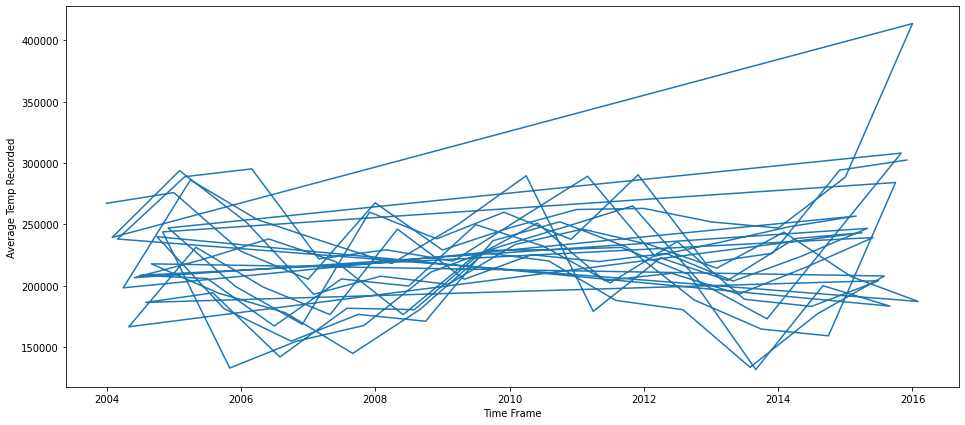

In [35]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Average Temp Recorded')
ax1.plot(ts)

In [36]:
adfuller_result = adfuller(ts, autolag='AIC')


In [37]:
print(f'ADF Statistic: {adfuller_result[0]}')

ADF Statistic: -1.54356355093066


In [38]:
print(f'p-value: {adfuller_result[1]}')

p-value: 0.5118616601150434


In [39]:
for key, value in adfuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

Critial Values:
   1%, -3.480118600110386
Critial Values:
   5%, -2.8833618426136196
Critial Values:
   10%, -2.578407034974382


In [40]:
newmodel = ARMA(ts,order=(1,1))

In [41]:
results = newmodel.fit()

In [55]:
predictions = results.predict('01/01/1996', '01/01/2016')

KeyError: ignored